In [4]:
import pynbody
import numpy as np
import add_obs
from plot_tools import *
import make_plots

In [5]:
path = '/scratch/hc2347/pickles/test/halfstellar_run0_0.205.p'
'./o'
data = load_halos_pickle(path)

In [25]:
out = '/scratch/hc2347/reports/60/run021620_hsr/'
data['zred'] = 0.1
data.keys()

dict_keys(['ndm', 'sfr_10', 'nstar', 'oxh', 'ngas', 'mgascool', 'zred', 'mgas', 'sfr_100', 'ID', 'z_star', 'mvir', 'npart', 'mstar', 'mdm'])

[4.73842795e+10 1.78044187e+07 3.45895171e+06 2.50529413e+08
 4.16042192e+09 3.12570300e+10 5.90201501e+07 9.00831620e+06
 3.56280435e+09 5.93551325e+06]
[0.02325924 0.00033301 0.00024932 0.00108838 0.00612512 0.0186415
 0.00061385 0.00035516 0.00453289 0.00027161]


/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


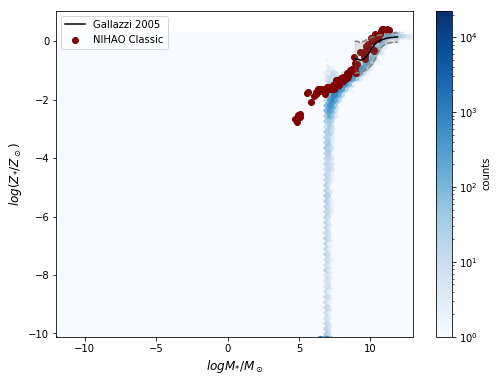

In [31]:
def do_filter(a, b):
    """Filter two lists such that if one entry is invalid, both elements from the lists are removed."""
    
    def is_valid(elm):
        return elm > 1 and np.isfinite(elm)

    #print(len(b))
    for idx in range(len(b) - 1, -1, -1):
        #print(idx)
        if not is_valid(b[idx]):
            a = np.delete(a,idx)
            b = np.delete(b,idx)
    return a,b

def plot_stellar_metallicity(z_star, m_star):

    z_sol = 0.013 # primordial Solar metallicity
    
    z_star, m_star = do_filter(z_star, m_star)

    x = np.log10(m_star)
    y = np.log10(z_star/z_sol)
    
    gallazzi = np.genfromtxt('./obs/Gallazzi_2005_SMZ_z0.csv',unpack=True,skip_header=2,delimiter=',')
    logmstar_tr = gallazzi[0]

    median_tr = gallazzi[1]
    sixteen_tr = gallazzi[2]
    eightyfour_tr = gallazzi[3]

    fig, ax = plt.subplots(figsize=(8,6))
    
    plt.hexbin(x,y,gridsize=100,bins='log',cmap="Blues")
    cb = plt.colorbar()
    cb.set_label("counts")

    nihao_x = np.array(nihao('Mstar',0))
    nihao_y = np.array([np.sum(z_vals) for z_vals in nihao('z_star',0)])
    print(nihao_x[:10])
    print(nihao_y[:10])
        
    ax.scatter(np.log10(nihao_x), np.log10(nihao_y/z_sol), color='maroon', label = "NIHAO Classic")
    
    
    ax.plot(logmstar_tr, median_tr, c='black',label = "Gallazzi 2005")
    ax.plot(logmstar_tr, sixteen_tr, linestyle='dashed',color='grey')
    ax.plot(logmstar_tr, eightyfour_tr, linestyle='dashed',color='grey')
    
    ax.fill_between(logmstar_tr, sixteen_tr, y2 = eightyfour_tr, alpha = 0.2, color='grey' )
    ax.set_ylabel('$log(Z_{*}/Z_\odot)$',fontsize=12)
    ax.set_xlabel('$ log M_{*}/M_\odot$',fontsize=12)
    ax.legend()

#     ax.set_ylim(-2,0.5)
#     ax.set_xlim(7,12)
    
    #plt.savefig(out + "Gallazzi_SMZR.png")

plot_stellar_metallicity(data['z_star'], data['mstar'])